# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [33]:
import tensorflow as tf
from tensorflow.keras import models, utils, optimizers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import json
from zipfile import ZipFile
from PIL import Image
from IPython.display import HTML


In [2]:
kaggle_credentails = json.load(open("kaggle.json"))

os.environ["KAGGLE_USERNAME"] = kaggle_credentails["username"]
os.environ["KAGGLE_KEY"] = kaggle_credentails["key"]

!kaggle datasets download -d shaharshh/plant-disease-detection-dataset

with ZipFile("plant-disease-detection-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

!rm  "plant-disease-detection-dataset.zip"


100% 2.69G/2.70G [00:31<00:00, 89.2MB/s]
100% 2.70G/2.70G [00:31<00:00, 91.9MB/s]


## Data Preprocessing

### Training Image preprocessing

In [3]:
training_set = utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [5]:
class_names = training_set.class_names
class_names


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [7]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(units=1500,activation='relu'))
cnn.add(Dropout(0.4))

cnn.add(Dense(units=38,activation='softmax'))


In [8]:
cnn.compile(optimizer=optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [9]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        3

In [10]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 [==============================] - 109s 46ms/step - loss: 3.0623 - accuracy: 0.2346 - val_loss: 1.9025 - val_accuracy: 0.4936
Epoch 2/10
2197/2197 [==============================] - 98s 44ms/step - loss: 1.2859 - accuracy: 0.6128 - val_loss: 0.9892 - val_accuracy: 0.7251
Epoch 3/10
2197/2197 [==============================] - 79s 36ms/step - loss: 0.7981 - accuracy: 0.7539 - val_loss: 0.5564 - val_accuracy: 0.8449
Epoch 4/10
2197/2197 [==============================] - 87s 39ms/step - loss: 0.5710 - accuracy: 0.8209 - val_loss: 0.4645 - val_accuracy: 0.8573
Epoch 5/10
2197/2197 [==============================] - 93s 42ms/step - loss: 0.4322 - accuracy: 0.8610 - val_loss: 0.3923 - val_accuracy: 0.8786
Epoch 6/10
2197/2197 [==============================] - 83s 38ms/step - loss: 0.3476 - accuracy: 0.8865 - val_loss: 0.2675 - val_accuracy: 0.9187
Epoch 7/10
2197/2197 [==============================] - 77s 35ms/step - loss: 0.2853 - accuracy: 0.9067 - val_loss: 0.2383 

## Evaluating Model

In [11]:
# Training Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 [==============================] - 55s 25ms/step - loss: 0.1183 - accuracy: 0.9660
Training accuracy: 0.9659719467163086


In [12]:
# Validation Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 [==============================] - 12s 22ms/step - loss: 0.1883 - accuracy: 0.9389
Validation accuracy: 0.9389369487762451


### Saving Model

In [13]:
cnn.save('trained_plant_disease_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
training_history.history


{'loss': [3.062305212020874,
  1.28593111038208,
  0.7981175780296326,
  0.5709856152534485,
  0.4321916103363037,
  0.34760773181915283,
  0.28534531593322754,
  0.24562574923038483,
  0.21301718056201935,
  0.18715494871139526],
 'accuracy': [0.2346397340297699,
  0.6127747297286987,
  0.7538800835609436,
  0.8209260702133179,
  0.8609573841094971,
  0.8865352869033813,
  0.906735897064209,
  0.9186002016067505,
  0.9287146925926208,
  0.9379187822341919],
 'val_loss': [1.9025198221206665,
  0.9891754388809204,
  0.556390106678009,
  0.4644668698310852,
  0.39225131273269653,
  0.2675146162509918,
  0.23834316432476044,
  0.2319595366716385,
  0.18992629647254944,
  0.18827539682388306],
 'val_accuracy': [0.4935693144798279,
  0.7250739932060242,
  0.844923734664917,
  0.8572729229927063,
  0.8785567879676819,
  0.9187343716621399,
  0.9263601303100586,
  0.926701545715332,
  0.9390507340431213,
  0.9389369487762451]}

In [15]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [16]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Visualising results

In [17]:
acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']


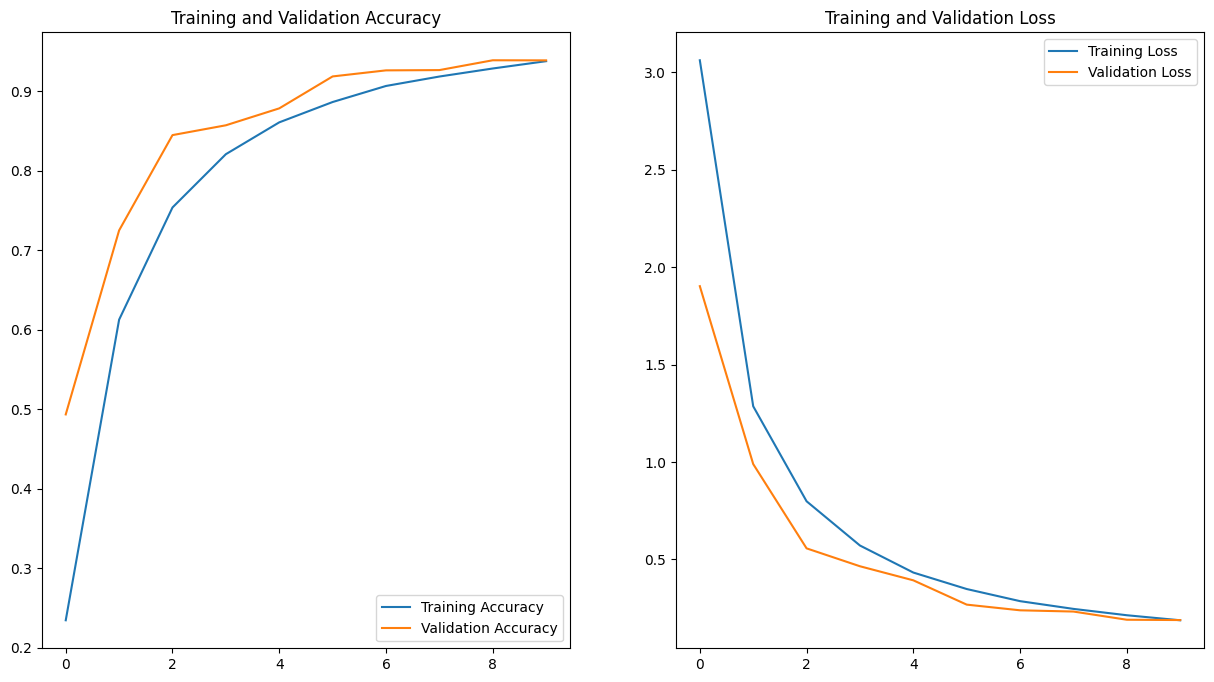

In [18]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Accuracy Visualization

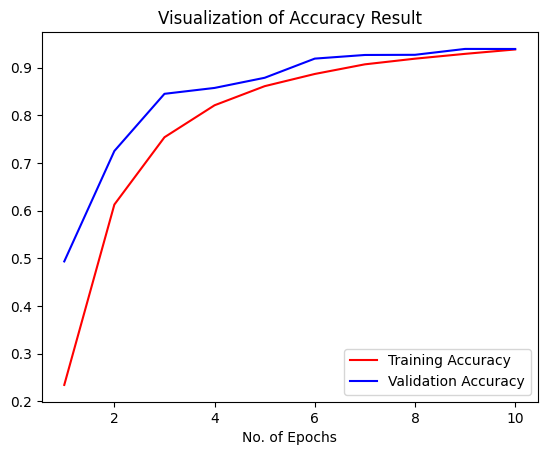

In [19]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


## Loss Visualization

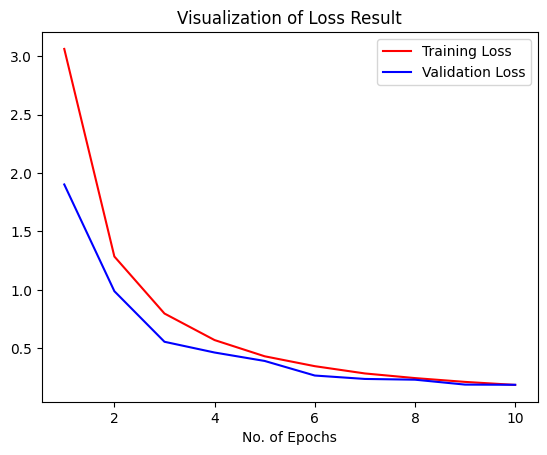

In [20]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()


## Model evaluation

In [21]:
class_name = validation_set.class_names


In [22]:
len(class_name)


38

In [28]:
test_set = utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [30]:
# Predicted

y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [32]:
# Actual

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [26]:
len(Y_true)


33

In [27]:
len(predicted_categories)


33

## Precision Recall Fscore

In [36]:
from sklearn.metrics import confusion_matrix,classification_report


In [37]:
# Precision Recall Fscore
print(classification_report(Y_true, predicted_categories, target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.91      0.94       504
                                 Apple___Black_rot       0.94      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.89      0.99      0.94       440
                                   Apple___healthy       0.91      0.96      0.93       502
                               Blueberry___healthy       0.96      0.94      0.95       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.95      0.89      0.92       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.91      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

In [34]:
HTML("""
<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm" />
""")


### Confusion Matrix Visualization

In [38]:
cm = confusion_matrix(Y_true, predicted_categories)


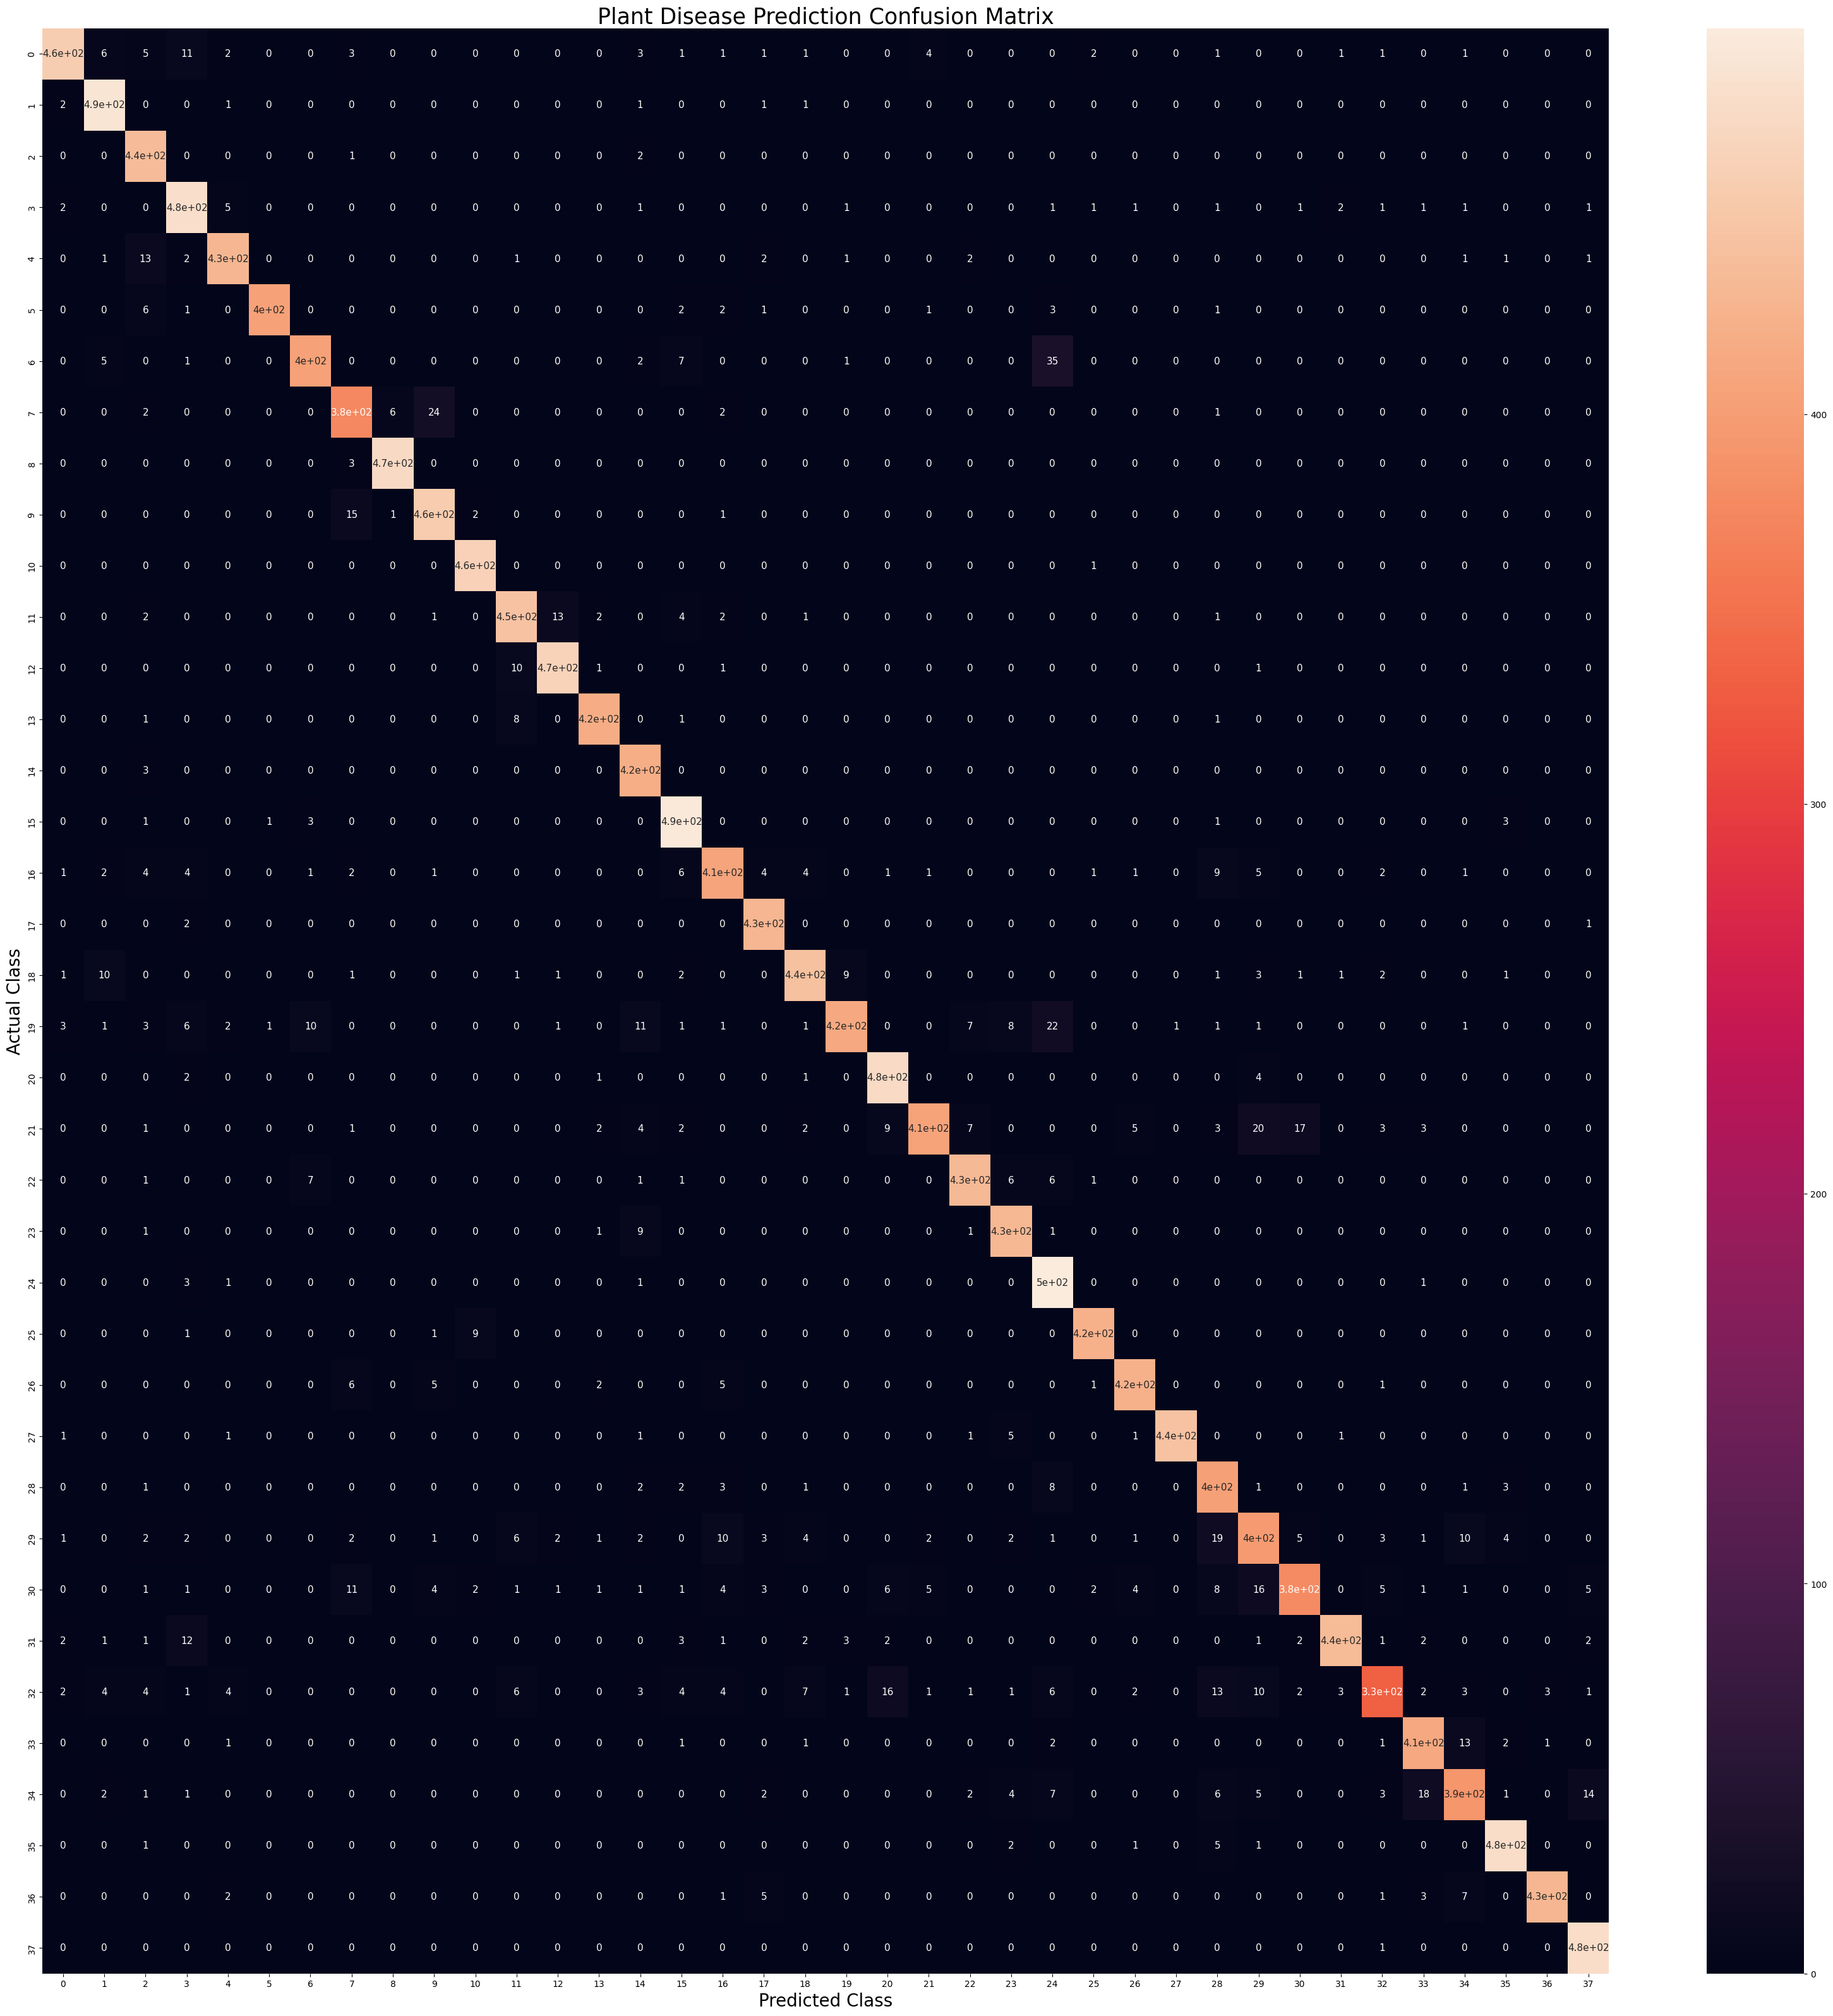

In [42]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 11})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()
